#### Climate research and weather analysis
To find out weather patterns and correlation between melting glaciers and rising temperatures between 1990 and 2022
<br><br> 
- Explore weather data from 5 cities in each hemisphere:
  - Northern Hemisphere
    - New York
    - Munich
    - Istanbul
    - Dubai
    - Tokyo
  - Equator
    - Bogotá
    - Brasília
    - Nairobi
    - Malé
    - Jakarta
  - Southern Hemisphere
    - Maputo
    - Antananarivo
    - Cape Town
    - Sydney
    - Auckland
- Analyze yearly and monthly avg, min, max temps and rainfall.
- Analyze melting glacier rate in north pole (Arctic) and south pole (Antarctica)
- Analyze CO2 levels and vegetation degradtion impact
- Analyze human/animal fatalities by environmental causes

<br> Disclaimer: The research is on-going and will be updated periodically


 

In [329]:
#importing libraries
import pandas as pd
import numpy as np
#import requests
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Stations, Normals
import seaborn as sbn

In [304]:
# Set time period
start = datetime(1990, 1, 1)
end = datetime(2022, 12, 31)

##The points are latitude and longitude, the MeteoStat API automatically uses Nearest Neighbour to fetch data from closest weather station to the lat & lon points provided

#Northern Hemisphere
#New York
new_york_location = Point(40.712776, -74.005974)
#Munich
munich_location = Point(48.135124, 11.581981)
#Istanbul
istanbul_location = Point(41.008240, 28.978359)
#Dubai
dubai_location = Point(25.276987, 55.296249)
#Tokyo
tokyo_location = Point(35.652832, 139.839478)

#Equator
#Bogotá
bogota_location = Point(4.624335, -74.063644)
#Rio de Janeiro
rio_de_janeiro_location = Point(-22.970722, -43.182365)
#Nairobi
nairobi_location = Point(-1.362863, 36.834583)
#Malé
male_location = Point(1.924992, 73.399658)
#Jakarta
jakarta_location = Point(-6.121435, 106.774124)

#Southern Hemisphere
#Maputo
maputo_location = Point(-25.953724, 32.588711)
#Antananarivo
antananarivo_location = Point(-18.879190, 47.507905)
#Cape Town
cape_town_location = Point(-34.254570, 18.406263)
#Sydney
sydney_location = Point(-33.870453, 151.208755)
#Auckland
auckland_location = Point(-36.850109, 174.767700)

In [305]:
# Get nearby weather stations using the points
stations = Stations()
stations = stations.nearby(40.712776, -74.005974)
station = stations.fetch(1)

# Print DataFrame
print(station)


                         name country region   wmo  icao  latitude  longitude  \
id                                                                              
KJRB0  New York / Wall Street      US     NY  <NA>  KJRB   40.7012    -74.009   

       elevation          timezone hourly_start hourly_end daily_start  \
id                                                                       
KJRB0        2.0  America/New_York   2016-07-20 2023-06-16  2016-07-21   

       daily_end monthly_start monthly_end     distance  
id                                                       
KJRB0 2022-04-24    2019-01-01  2021-01-01  1312.220903  


In [306]:
#Northern Hemisphere
new_york_data = Daily(new_york_location, start, end)
new_york_data = new_york_data.fetch()
df_new_york = pd.DataFrame(new_york_data)
ny_location = 'new_york'
df_new_york['location'] = ny_location

munich_data = Daily(munich_location, start, end)
munich_data = munich_data.fetch()
df_munich = pd.DataFrame(munich_data)
mu_location = 'munich'
df_munich['location'] = mu_location

istanbul_data = Daily(istanbul_location, start, end)
istanbul_data = istanbul_data.fetch()
df_istanbul = pd.DataFrame(istanbul_data)
ist_location = 'istanbul'
df_istanbul['location'] = ist_location

dubai_data = Daily(dubai_location, start, end)
dubai_data = dubai_data.fetch()
df_dubai = pd.DataFrame(dubai_data)
dub_location = 'dubai'
df_dubai['location'] = dub_location

tokyo_data = Daily(tokyo_location, start, end)
tokyo_data = tokyo_data.fetch()
df_tokyo = pd.DataFrame(tokyo_data)
tok_location = 'tokyo'
df_tokyo['location'] = tok_location

#Equator
bogota_data = Daily(bogota_location, start, end)
bogota_data = bogota_data.fetch()
df_bogota = pd.DataFrame(bogota_data)
bog_location = 'bogota'
df_bogota['location'] = bog_location

rio_data = Daily(rio_de_janeiro_location, start, end)
rio_data = rio_data.fetch()
df_rio = pd.DataFrame(rio_data)
rio_location = 'rio_de_janeiro'
df_rio['location'] = rio_location

nairobi_data = Daily(nairobi_location, start, end)
nairobi_data = nairobi_data.fetch()
df_nairobi = pd.DataFrame(nairobi_data)
nai_location = 'nairobi'
df_nairobi['location'] = nai_location

male_data = Daily(male_location, start, end)
male_data = male_data.fetch()
df_male = pd.DataFrame(male_data)
male_location = 'male'
df_male['location'] = male_location

jakarta_data = Daily(jakarta_location, start, end)
jakarta_data = jakarta_data.fetch()
df_jakarta = pd.DataFrame(jakarta_data)
jak_location = 'jakarata'
df_jakarta['location'] = jak_location

#Southern Hemisphere
maputo_data = Daily(maputo_location, start, end)
maputo_data = maputo_data.fetch()
df_maputo = pd.DataFrame(maputo_data)
mapu_location = 'maputo'
df_maputo['location'] = mapu_location

ant_data = Daily(antananarivo_location, start, end)
ant_data = ant_data.fetch()
df_ant = pd.DataFrame(ant_data)
ant_location = 'antananarivo'
df_ant['location'] = ant_location

cape_data = Daily(cape_town_location, start, end)
cape_data = cape_data.fetch()
df_cape = pd.DataFrame(cape_data)
cape_location = 'cape_town'
df_cape['location'] = cape_location

sydney_data = Daily(sydney_location, start, end)
sydney_data = sydney_data.fetch()
df_sydney = pd.DataFrame(sydney_data)
syd_location = 'sydney'
df_sydney['location'] = syd_location

auckland_data = Daily(auckland_location, start, end)
auckland_data = auckland_data.fetch()
df_auckland = pd.DataFrame(auckland_data)
auck_location = 'auckland'
df_auckland['location'] = auck_location



In [307]:
##Add hemisphere field where loc is ....
dframes_uncon = [df_new_york, df_munich, df_istanbul, df_dubai, df_tokyo,
                 ##
                 df_bogota, df_rio, df_nairobi, df_male, df_jakarta,
                 ##
                 df_maputo, df_ant, df_cape, df_sydney, df_auckland]
dframes = pd.concat(dframes_uncon)

In [308]:
dframes.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,location
time,,,,,,,,,,,
1990-01-01,4.3,0.0,7.8,3.6,0.0,271.0,27.0,79.6,1006.8,NaN,new_york
1990-01-02,1.6,-2.8,6.1,0.0,0.0,254.0,18.7,46.4,1025.9,NaN,new_york
1990-01-03,3.9,-1.7,10.0,0.0,0.0,NaN,11.2,24.1,1026.0,NaN,new_york
1990-01-04,4.9,0.6,10.6,0.0,0.0,215.0,14.4,33.5,1016.8,NaN,new_york
1990-01-05,6.2,2.2,9.4,0.0,0.0,NaN,15.8,46.4,1018.9,NaN,new_york


In [309]:
city = dframes['location'].unique()

In [310]:
city

array(['new_york', 'munich', 'istanbul', 'dubai', 'tokyo', 'bogota',
       'rio_de_janeiro', 'nairobi', 'male', 'jakarata', 'maputo',
       'antananarivo', 'cape_town', 'sydney', 'auckland'], dtype=object)

In [311]:
dframes['hemisphere'] = 'equator'

In [312]:
dframes.loc[(dframes['location'] == 'new_york') | (dframes['location'] == 'munich') | (dframes['location'] == 'istanbul') | (dframes['location'] == 'dubai') | (dframes['location'] == 'tokyo'), 'hemisphere'] = 'northern_hemisphere'
#Equator is already added
dframes.loc[(dframes['location'] == 'maputo') |(dframes['location'] == 'cape_town') |(dframes['location'] == 'sydney') | (dframes['location'] == 'sydney') | (dframes['location'] == 'auckland'), 'hemisphere'] = 'souththern_hemisphere'  

In [313]:
dframes

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,location,hemisphere
time,,,,,,,,,,,,
1990-01-01,4.3,0.0,7.8,3.6,0.0,271.0,27.0,79.6,1006.8,NaN,new_york,northern_hemisphere
1990-01-02,1.6,-2.8,6.1,0.0,0.0,254.0,18.7,46.4,1025.9,NaN,new_york,northern_hemisphere
1990-01-03,3.9,-1.7,10.0,0.0,0.0,NaN,11.2,24.1,1026.0,NaN,new_york,northern_hemisphere
1990-01-04,4.9,0.6,10.6,0.0,0.0,215.0,14.4,33.5,1016.8,NaN,new_york,northern_hemisphere
1990-01-05,6.2,2.2,9.4,0.0,0.0,NaN,15.8,46.4,1018.9,NaN,new_york,northern_hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,19.3,15.7,23.2,2.9,NaN,136.0,7.1,NaN,1019.1,NaN,auckland,souththern_hemisphere
2022-12-28,19.9,15.8,23.8,0.0,NaN,67.0,9.2,NaN,1021.5,NaN,auckland,souththern_hemisphere
2022-12-29,19.3,16.0,22.1,3.1,NaN,8.0,7.7,NaN,1023.6,NaN,auckland,souththern_hemisphere


In [314]:
dframes.reset_index(inplace=True)

In [315]:
dframes

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,location,hemisphere
0,1990-01-01,4.3,0.0,7.8,3.6,0.0,271.0,27.0,79.6,1006.8,NaN,new_york,northern_hemisphere
1,1990-01-02,1.6,-2.8,6.1,0.0,0.0,254.0,18.7,46.4,1025.9,NaN,new_york,northern_hemisphere
2,1990-01-03,3.9,-1.7,10.0,0.0,0.0,NaN,11.2,24.1,1026.0,NaN,new_york,northern_hemisphere
3,1990-01-04,4.9,0.6,10.6,0.0,0.0,215.0,14.4,33.5,1016.8,NaN,new_york,northern_hemisphere
4,1990-01-05,6.2,2.2,9.4,0.0,0.0,NaN,15.8,46.4,1018.9,NaN,new_york,northern_hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159025,2022-12-27,19.3,15.7,23.2,2.9,NaN,136.0,7.1,NaN,1019.1,NaN,auckland,souththern_hemisphere
159026,2022-12-28,19.9,15.8,23.8,0.0,NaN,67.0,9.2,NaN,1021.5,NaN,auckland,souththern_hemisphere
159027,2022-12-29,19.3,16.0,22.1,3.1,NaN,8.0,7.7,NaN,1023.6,NaN,auckland,souththern_hemisphere
159028,2022-12-30,19.4,16.9,22.2,0.0,NaN,222.0,14.4,NaN,1019.5,NaN,auckland,souththern_hemisphere


In [316]:
df = dframes.rename(columns={'time': 'date'})

In [317]:
df.shape

(159030, 13)

In [320]:
df.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,153216.000000,143590.000000,144234.000000,98457.000000,23029.000000,67339.000000,100839.000000,14331.000000,58439.000000,12837.000000
mean,18.951867,14.517599,23.339180,3.320326,7.486821,172.941416,13.010080,34.865753,1015.832983,287.411467
std,7.678968,7.826701,8.357022,10.321742,35.296929,108.324262,6.336859,15.243762,7.381124,273.272550
min,-17.800000,-18.900000,-13.300000,0.000000,0.000000,0.000000,0.000000,3.600000,933.800000,0.000000
25%,14.000000,9.500000,18.600000,0.000000,0.000000,70.000000,8.700000,24.100000,1011.000000,12.000000
50%,19.500000,14.700000,24.000000,0.000000,0.000000,178.000000,11.600000,31.300000,1015.900000,222.000000
75%,24.300000,20.000000,29.000000,2.000000,0.000000,266.000000,15.800000,42.500000,1020.600000,510.000000
max,41.900000,38.000000,49.000000,450.100000,787.000000,360.000000,76.500000,124.600000,1045.000000,943.000000


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159030 entries, 0 to 159029
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        159030 non-null  datetime64[ns]
 1   tavg        153216 non-null  float64       
 2   tmin        143590 non-null  float64       
 3   tmax        144234 non-null  float64       
 4   prcp        98457 non-null   float64       
 5   snow        23029 non-null   float64       
 6   wdir        67339 non-null   float64       
 7   wspd        100839 non-null  float64       
 8   wpgt        14331 non-null   float64       
 9   pres        58439 non-null   float64       
 10  tsun        12837 non-null   float64       
 11  location    159030 non-null  object        
 12  hemisphere  159030 non-null  object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 15.8+ MB


EDA

In [325]:
df.corr()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
tavg,1.000000,0.965673,0.970473,0.000181,-0.309148,-0.168645,-0.080204,0.049581,-0.380311,0.462676
tmin,0.965673,1.000000,0.908834,0.033062,-0.307773,-0.168551,-0.040187,0.059142,-0.398037,0.295237
tmax,0.970473,0.908834,1.000000,-0.026960,-0.304473,-0.164396,-0.114581,0.045058,-0.357046,0.560723
prcp,0.000181,0.033062,-0.026960,1.000000,0.003863,-0.002834,0.070483,0.229970,-0.168872,-0.207020
snow,-0.309148,-0.307773,-0.304473,0.003863,1.000000,0.023038,0.042448,-0.019152,0.036555,-0.125728
wdir,-0.168645,-0.168551,-0.164396,-0.002834,0.023038,1.000000,0.057171,0.262723,-0.078050,-0.238196
wspd,-0.080204,-0.040187,-0.114581,0.070483,0.042448,0.057171,1.000000,0.776114,-0.113800,-0.275357
wpgt,0.049581,0.059142,0.045058,0.229970,-0.019152,0.262723,0.776114,1.000000,-0.287508,-0.120503
pres,-0.380311,-0.398037,-0.357046,-0.168872,0.036555,-0.078050,-0.113800,-0.287508,1.000000,0.074102
tsun,0.462676,0.295237,0.560723,-0.207020,-0.125728,-0.238196,-0.275357,-0.120503,0.074102,1.000000


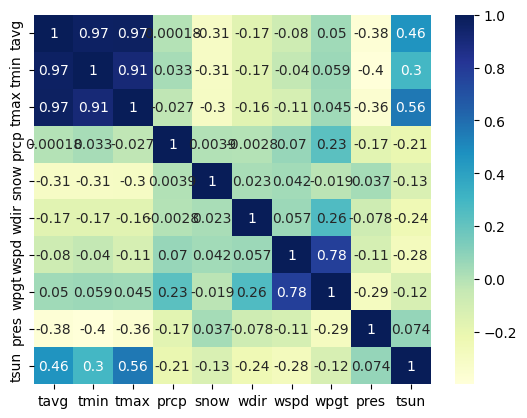

In [330]:
dataplot = sbn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

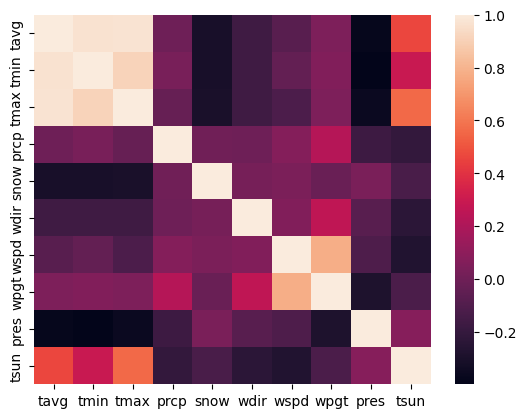

In [331]:
dataplot=sbn.heatmap(df.corr())
plt.show()

In [334]:
duplicate_rows = df[df.duplicated()]
print("duplicate rows: ", duplicate_rows.shape)

duplicate rows:  (0, 13)


In [336]:
#total rows 159030 
print(df.isnull().sum())

date               0
tavg            5814
tmin           15440
tmax           14796
prcp           60573
snow          136001
wdir           91691
wspd           58191
wpgt          144699
pres          100591
tsun          146193
location           0
hemisphere         0
dtype: int64


<AxesSubplot:xlabel='tavg'>

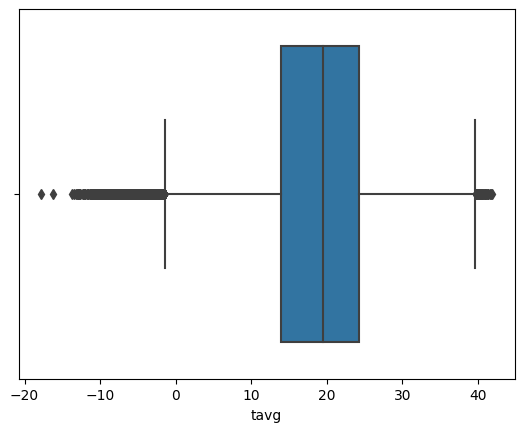

In [337]:
sbn.boxplot(x=df['tavg'])

<AxesSubplot:xlabel='tmin'>

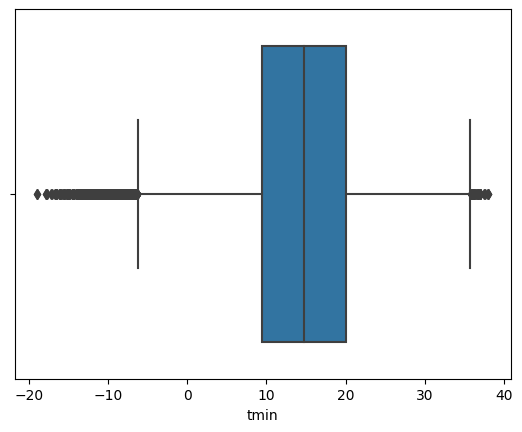

In [338]:
sbn.boxplot(x=df['tmin'])

<AxesSubplot:xlabel='tmax'>

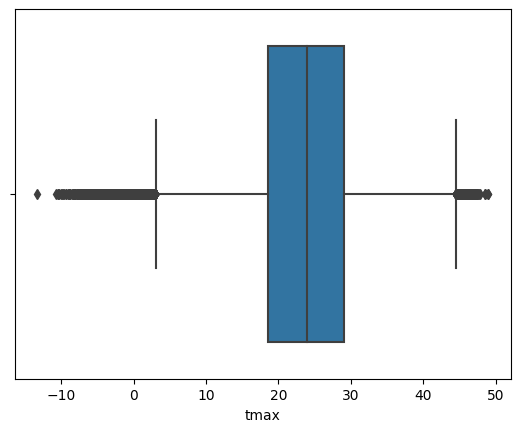

In [339]:
sbn.boxplot(x=df['tmax'])

<AxesSubplot:xlabel='prcp'>

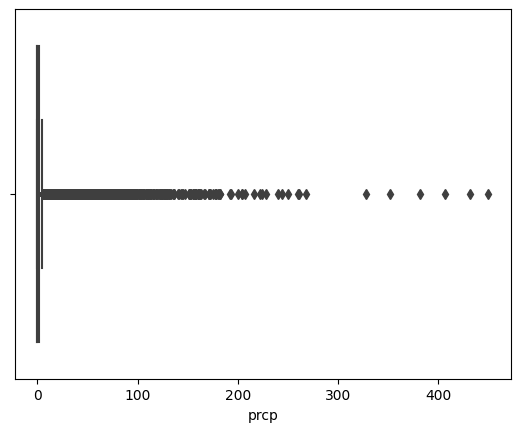

In [340]:
sbn.boxplot(x=df['prcp'])

<AxesSubplot:xlabel='tsun'>

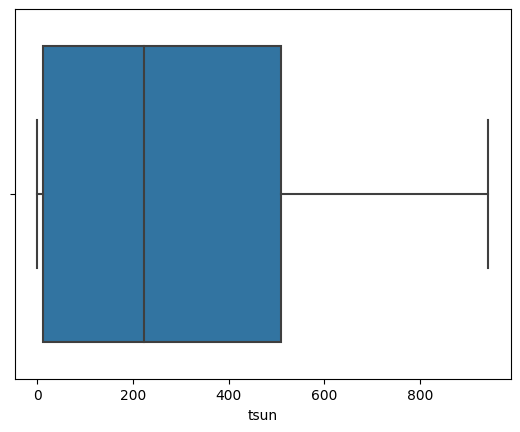

In [341]:
sbn.boxplot(x=df['tsun'])

In [342]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

tavg     10.3
tmin     10.5
tmax     10.4
prcp      2.0
snow      0.0
wdir    196.0
wspd      7.1
wpgt     18.4
pres      9.6
tsun    498.0
dtype: float64


Text(0.5, 0, 'Cities')

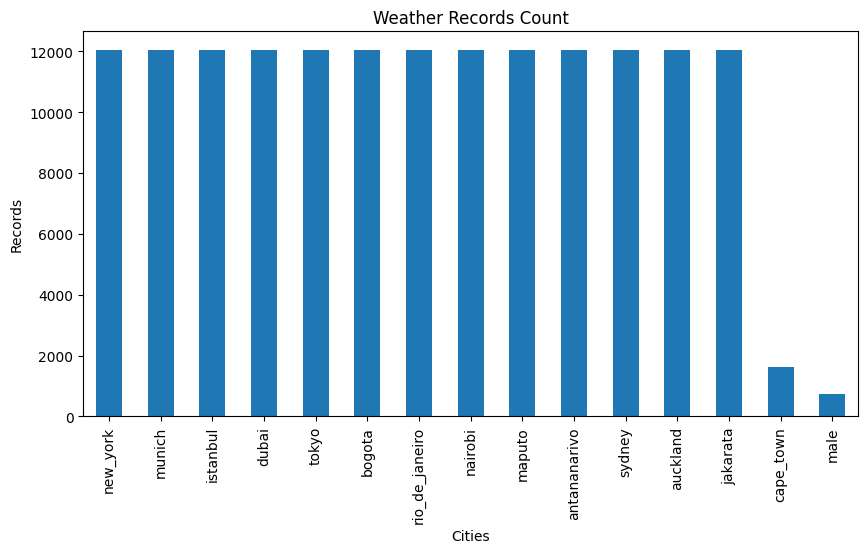

In [347]:
df.location.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Weather Records Count")
plt.ylabel('Records')
plt.xlabel('Cities')

Cape Town's and Male's records are not captured completely

In [357]:
df.loc[(df['location'] == 'cape_town'), 'date'].min()

Timestamp('2018-07-21 00:00:00')

In [358]:
df.loc[(df['location'] == 'male'), 'date'].min()

Timestamp('2021-01-02 00:00:00')

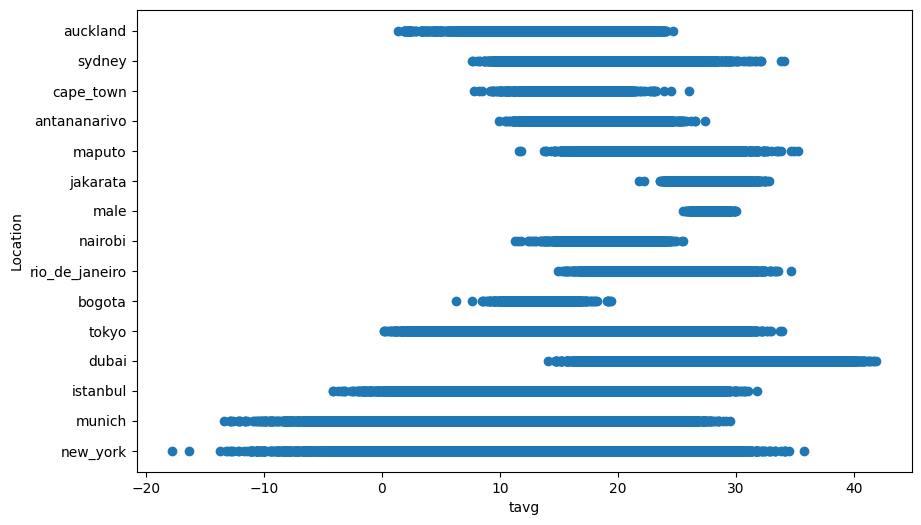

In [359]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['tavg'], df['location'])
ax.set_xlabel('tavg')
ax.set_ylabel('Location')
plt.show()